# Solicitacao da materia de IA

Para o entregável da nossa disciplina, vocês realizarão todas as etapas que fazem parte do dia a dia de um cientista
de dados. São fornecidos 4 arquivos csv (Teams e Portal) com diferentes informações sobre poluição envolvendo
plástico, e um arquivo com informações de qualidade de água para diferentes regiões. Uma coluna em comum
entre todas as bases (chave primária) de dados é a coluna Entidade, que contém o nome do país associado.

# Requisitos:
╸ [30 pts] Fazer uma análise exploratória de dados com os arquivos 1 a 4 (ao menos um gráfico para cada
arquivo), gerando visualizações que possam trazer insights sobre a relação do plástico com o oceano e a
poluição.

╸ [30 pts] Queremos treinar um modelo de ML para predizer a qualidade da água do oceano com base em
dados de plástico. Combine o arquivo 5 com os arquivos de 1 a 4 (se guiando pela chave primária, e
lembrando que dados do mundo real possuem problemas que precisam de atenção especial). Após juntar os
dados, treine um modelo para predizer a qualidade da água com base nas outras colunas.

# Analise da producao de plastico

Dados que estao disponiveis neste material

•	Entidade: Nome do país ou região (no caso dos primeiros registros, “Mundo”).

•	Ano: O ano de registro da produção.

•	Produção Anual de Plástico: Quantidade de plástico produzido, estamos fazendo referencia em toneladas.

In [6]:

import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('1- producao-de-plastico-global.csv')

# Exibir as primeiras  cinco linhas do dataframe e informações gerais para entendermos melhor o problema
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Entidade                    69 non-null     object
 1   Ano                         69 non-null     int64 
 2   Produção Anual de Plástico  69 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


(  Entidade   Ano  Produção Anual de Plástico
 0    Mundo  1950                     2000000
 1    Mundo  1951                     2000000
 2    Mundo  1952                     2000000
 3    Mundo  1953                     3000000
 4    Mundo  1954                     3000000,
 None)

Matplotlib is building the font cache; this may take a moment.


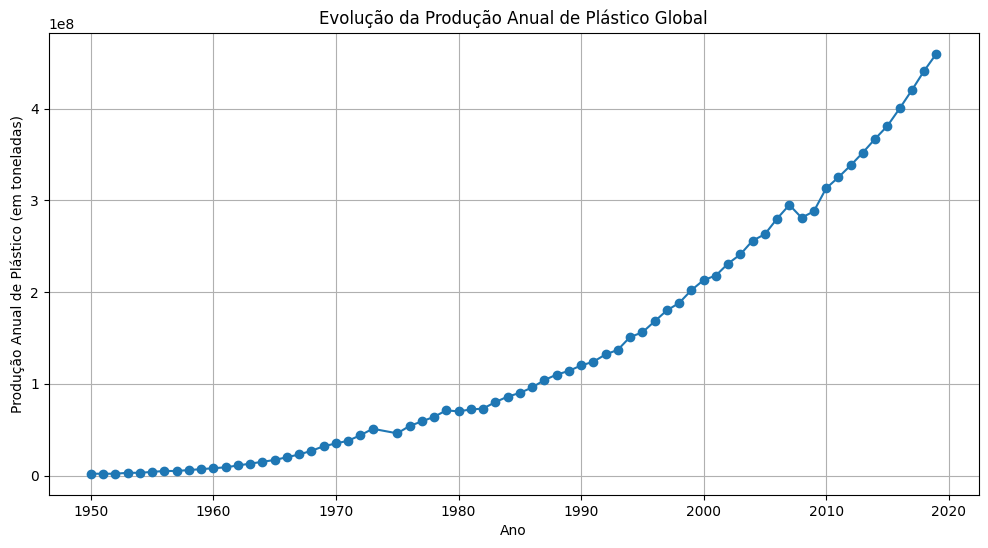

In [8]:
import matplotlib.pyplot as plt

# Criacao um grafico de linha para visualizar a produção de plástico ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(df['Ano'], df['Produção Anual de Plástico'], marker='o')
plt.title('Evolução da Produção Anual de Plástico Global')
plt.xlabel('Ano')
plt.ylabel('Produção Anual de Plástico (em toneladas)')
plt.grid(True)
plt.show()

# Analise do grupo sobre o tema

O gráfico mostra a evolução da produção anual de plástico global ao longo dos anos. É evidente um aumento significativo na produção à medida que avançamos no tempo, o que pode ser um indicativo da crescente contribuição para a poluição por plástico, especialmente nos oceanos. Os dados iniciaram em 1950 e temos uma base ate 2020, o que mostra uma base bem consolidade de quase 70 anos. O numero vem so aumentando e somente tivemos melhorias mas curtas nos anos 70,80,2008 aproximadamente.

# Analise Despejo de residuos

	•	Entidade: Nome do país ou região.
	•	Código: Código do país (alguns valores estão faltando). Esse codigo sera nosso ID principal.
	•	Ano: Ano do registro de dados.
	•	Participação na emissão global de plásticos para o oceano: Percentual que cada entidade contribui para a emissão global de plásticos no oceano.

In [9]:

import pandas as pd

df_residuos = pd.read_csv('2- participacao-despejo-residuo-plastico.csv')

df_residuos.head(), df_residuos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entidade                                                   170 non-null    object 
 1   Código                                                     159 non-null    object 
 2   Ano                                                        170 non-null    int64  
 3   Participação na emissão global de plásticos para o oceano  170 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.4+ KB


(              Entidade Código   Ano  \
 0               Africa    NaN  2019   
 1              Albania    ALB  2019   
 2              Algeria    DZA  2019   
 3               Angola    AGO  2019   
 4  Antigua and Barbuda    ATG  2019   
 
    Participação na emissão global de plásticos para o oceano  
 0                                           7.989317          
 1                                           0.159782          
 2                                           0.589510          
 3                                           0.087804          
 4                                           0.000204          ,
 None)

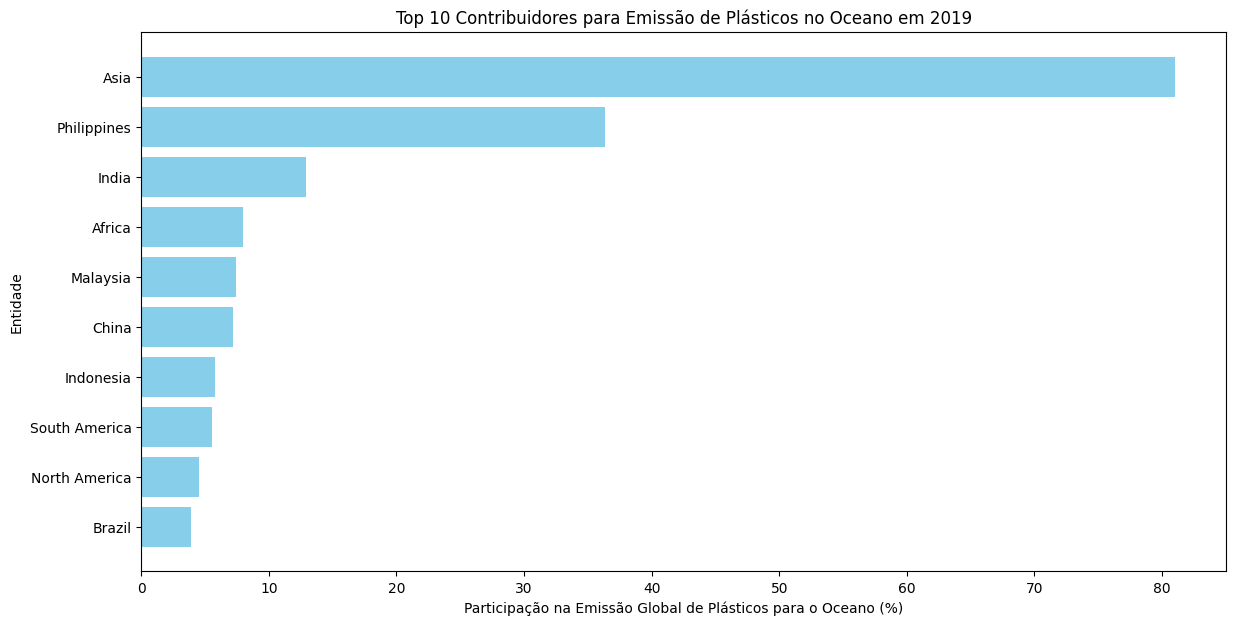

In [10]:
# Filtrar os dados para o ano mais recente disponível, 2019. Nao desejo saber dos demais aqui, por hora.
data_2019 = df_residuos[df_residuos['Ano'] == 2019]

# Ordenar os dados pelo percentual de emissão de plásticos para o oceano
sorted_data_2019 = data_2019.sort_values(by='Participação na emissão global de plásticos para o oceano', ascending=False).head(10)

# Criar um gráfico de barras
plt.figure(figsize=(14, 7))
plt.barh(sorted_data_2019['Entidade'], sorted_data_2019['Participação na emissão global de plásticos para o oceano'], color='skyblue')
plt.title('Top 10 Contribuidores para Emissão de Plásticos no Oceano em 2019')
plt.xlabel('Participação na Emissão Global de Plásticos para o Oceano (%)')
plt.ylabel('Entidade')
plt.gca().invert_yaxis()  # Inverter o eixo y para o maior contribuidor aparecer no topo
plt.show()

# Analise final sobre os residuos

No gráfico acima, mostramos os 10 principais contribuidores para a emissão de plásticos no oceano no ano de 2019. Esta visualização ajuda a destacar quais países ou regiões são responsáveis por uma maior parcela da poluição plástica oceânica global, fornecendo insights importantes para possíveis áreas de foco em esforços de limpeza ou regulamentação.

## Analise sobre o Destino dos plasticos

•	Entidade: Nome do país ou região.

•	Código: Código do país (com muitos valores faltantes).

•	Ano: Ano dos dados.

•	Participação da reciclagem do lixo total regional: Percentual do lixo que foi reciclado na região.

•	Participação da queima do lixo total regional: Percentual do lixo que foi queimado na região.

•	Participação do lixo descartado e mal gerido do total regional: Percentual do lixo que foi descartado ou mal gerido.

•	Participação do lixo encaminhado para aterros do total regional: Percentual do lixo que foi encaminhado para aterros.

In [13]:

import pandas as pd

df_destino = pd.read_csv('3- destino-plastico.csv')

df_destino.head(), df_destino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entidade                                                          200 non-null    object 
 1    Código                                                           80 non-null     object 
 2    Ano                                                              200 non-null    int64  
 3    Participação da reciclagem do lixo total regional                200 non-null    float64
 4    Participação da queima do lixo total regional                    200 non-null    float64
 5    Participação do lixo descartado e mal gerido do total regional   200 non-null    float64
 6    Participação do lixo encaminhado para aterros do total regional  200 non-null    float64
dtypes: float64(4), int64(1), object(2)
m

(               Entidade  Código   Ano  \
 0  Americas (excl. USA)     NaN  2000   
 1  Americas (excl. USA)     NaN  2001   
 2  Americas (excl. USA)     NaN  2002   
 3  Americas (excl. USA)     NaN  2003   
 4  Americas (excl. USA)     NaN  2004   
 
     Participação da reciclagem do lixo total regional  \
 0                                           4.721963    
 1                                           4.972505    
 2                                           5.227469    
 3                                           5.482511    
 4                                           5.740007    
 
     Participação da queima do lixo total regional  \
 0                                        1.220057   
 1                                        1.208672   
 2                                        1.197566   
 3                                        1.186352   
 4                                        1.175283   
 
     Participação do lixo descartado e mal gerido do total regional  \

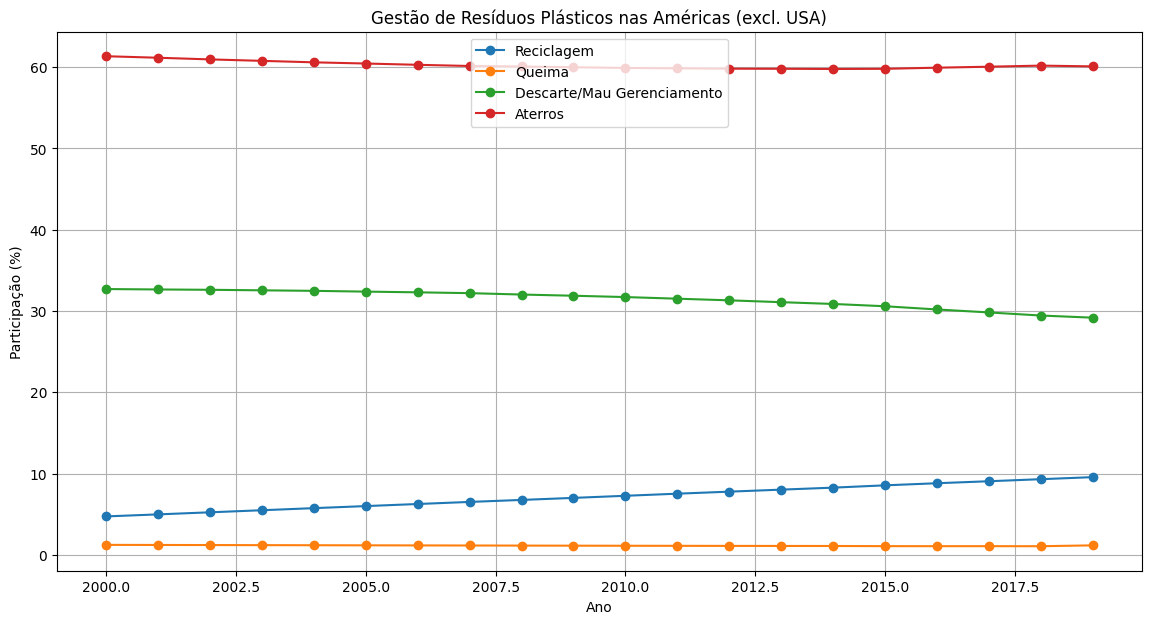

In [14]:
# Corrigir o nome das colunas (removendo espaços adicionais)
df_destino.columns = df_destino.columns.str.strip()

# Refazer a filtragem para a região "Americas (excl. USA)"
americas_data = df_destino[df_destino['Entidade'] == 'Americas (excl. USA)']

# Criar novamente o gráfico de linhas para visualizar as tendências na gestão de resíduos
plt.figure(figsize=(14, 7))
plt.plot(americas_data['Ano'], americas_data['Participação da reciclagem do lixo total regional'], label='Reciclagem', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação da queima do lixo total regional'], label='Queima', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação do lixo descartado e mal gerido do total regional'], label='Descarte/Mau Gerenciamento', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação do lixo encaminhado para aterros do total regional'], label='Aterros', marker='o')
plt.title('Gestão de Resíduos Plásticos nas Américas (excl. USA)')
plt.xlabel('Ano')
plt.ylabel('Participação (%)')
plt.legend()
plt.grid(True)
plt.show()

# Analise 

O gráfico acima ilustra as tendências na gestão de resíduos plásticos na região das Américas (excluindo os EUA) ao longo dos anos. Ele mostra a participação percentual de diferentes métodos de tratamento de resíduos, incluindo reciclagem, queima, descarte/mal gerenciamento e encaminhamento para aterros.

Podemos observar que, apesar de uma tendência de aumento na reciclagem, uma grande parte dos resíduos ainda é descartada ou mal gerida, o que pode contribuir significativamente para a poluição plástica.

# Analise sobre Desperdicio do plastico por pessoa / cabeca

•	Entidade: Nome do país ou região.

•	Código: Código do país (com alguns valores faltantes).

•	Ano: Ano dos dados.

•	Lixo plástico mal gerenciado por pessoa (kg por ano): Quantidade de lixo plástico mal gerenciado por pessoa em cada país, expresso em quilogramas por ano.

In [16]:

import pandas as pd

df_desperdicio = pd.read_csv('4- desperdicio-plastico-per-capita.csv')

df_desperdicio.head(), df_desperdicio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entidade                                               165 non-null    object 
 1    Código                                                160 non-null    object 
 2    Ano                                                   165 non-null    int64  
 3    Lixo plástico mal gerenciado por pessoa (kg por ano)  165 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


(              Entidade  Código   Ano  \
 0               Africa     NaN  2019   
 1              Albania     ALB  2019   
 2              Algeria     DZA  2019   
 3               Angola     AGO  2019   
 4  Antigua and Barbuda     ATG  2019   
 
     Lixo plástico mal gerenciado por pessoa (kg por ano)  
 0                                          10.465928      
 1                                          24.239153      
 2                                          17.758995      
 3                                           7.445279      
 4                                           6.463918      ,
 None)

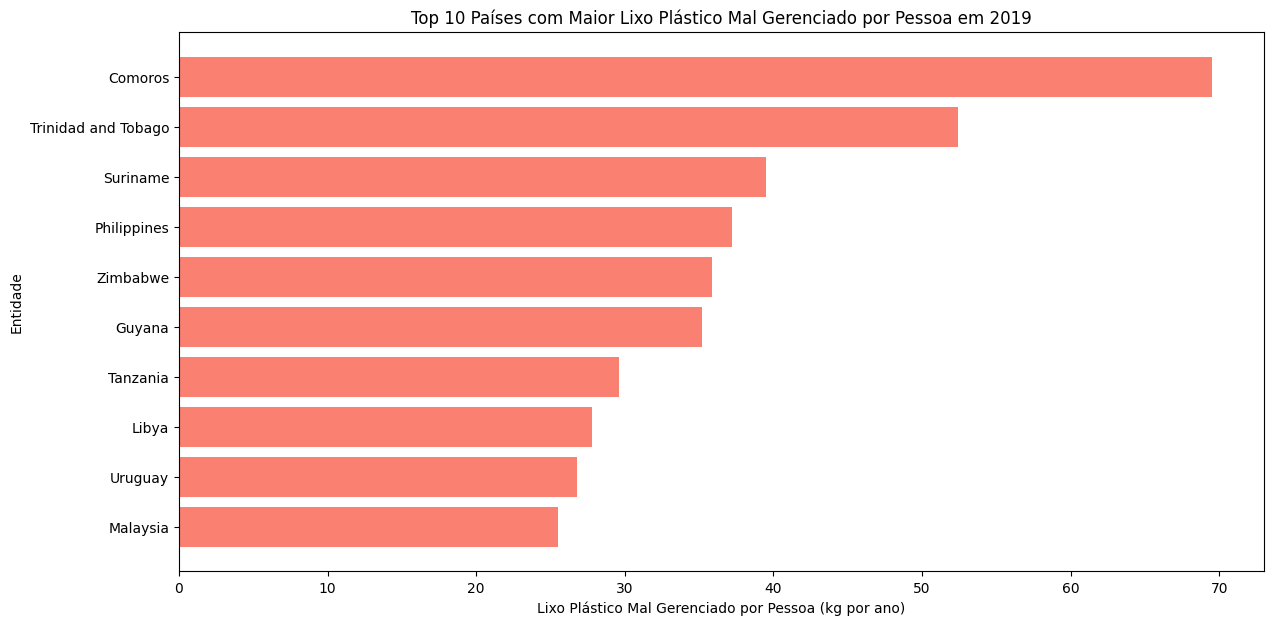

In [17]:
# Corrigir o nome das colunas (removendo espaços adicionais -  Isso gerou conflito na hora de gerar as informacoes)
df_desperdicio.columns = df_desperdicio.columns.str.strip()

# Refazer a filtragem para o ano 2019
data_2019_per_capita = df_desperdicio[df_desperdicio['Ano'] == 2019]

# Refazer a ordenação dos dados pela quantidade de lixo plástico mal gerenciado por pessoa
sorted_data_2019_per_capita = data_2019_per_capita.sort_values(by='Lixo plástico mal gerenciado por pessoa (kg por ano)', ascending=False).head(10)

# Criar novamente o gráfico de barras
plt.figure(figsize=(14, 7))
plt.barh(sorted_data_2019_per_capita['Entidade'], sorted_data_2019_per_capita['Lixo plástico mal gerenciado por pessoa (kg por ano)'], color='salmon')
plt.title('Top 10 Países com Maior Lixo Plástico Mal Gerenciado por Pessoa em 2019')
plt.xlabel('Lixo Plástico Mal Gerenciado por Pessoa (kg por ano)')
plt.ylabel('Entidade')
plt.gca().invert_yaxis()  # Inverter o eixo y para o maior contribuidor aparecer no topo
plt.show()

# Analise 

O gráfico acima destaca os 10 países com o maior lixo plástico mal gerenciado por pessoa em 2019. Isso fornece uma visão clara de onde o gerenciamento de resíduos plásticos per capita é mais problemático e pode ajudar a direcionar esforços de intervenção e políticas para essas áreas.

## Analise Final para juncao dos quatro arquivos

# Este será o conjunto de dados que combinaremos com os anteriores para o treinamento do modelo de machine learning. 

•	Cidade: Nome da cidade.

•	Região: Região ou estado em que a cidade está localizada (com alguns valores faltantes).

•	Entidade: Nome do país.

•	Qualidade do Ar: Índice de qualidade do ar (valores numéricos).

•	Poluição da Água: Índice de poluição da água (valores numéricos).



In [18]:

import pandas as pd

df_final = pd.read_csv('5- poluicao-agua-cidades.csv')

df_final.head(), df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cidade             3963 non-null   object 
 1    Região            3538 non-null   object 
 2    Entidade          3963 non-null   object 
 3    Qualidade do Ar   3963 non-null   float64
 4    Poluição da Água  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


(             Cidade                Região                  Entidade  \
 0     New York City              New York  United States of America   
 1  Washington, D.C.  District of Columbia  United States of America   
 2     San Francisco            California  United States of America   
 3            Berlin                   NaN                   Germany   
 4       Los Angeles            California  United States of America   
 
     Qualidade do Ar   Poluição da Água  
 0         46.816038          49.504950  
 1         66.129032          49.107143  
 2         60.514019          43.000000  
 3         62.364130          28.612717  
 4         36.621622          61.299435  ,
 None)

In [19]:
# Corrigir o nome das colunas (removendo espaços adicionais)
df_final.columns = df_final.columns.str.strip()

df_final.head(), df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cidade            3963 non-null   object 
 1   Região            3538 non-null   object 
 2   Entidade          3963 non-null   object 
 3   Qualidade do Ar   3963 non-null   float64
 4   Poluição da Água  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


(             Cidade                Região                  Entidade  \
 0     New York City              New York  United States of America   
 1  Washington, D.C.  District of Columbia  United States of America   
 2     San Francisco            California  United States of America   
 3            Berlin                   NaN                   Germany   
 4       Los Angeles            California  United States of America   
 
    Qualidade do Ar  Poluição da Água  
 0        46.816038         49.504950  
 1        66.129032         49.107143  
 2        60.514019         43.000000  
 3        62.364130         28.612717  
 4        36.621622         61.299435  ,
 None)

In [20]:
# Agregar o índice de poluição da água por país, calculando a média para cada país
df_agregado = df_final.groupby('Entidade')['Poluição da Água'].mean().reset_index()

# Mostrar o resultado da agregação
df_agregado.head()

,Entidade,Poluição da Água
0,Afghanistan,53.440657
1,Albania,57.834201
2,Algeria,50.623043
3,Andorra,25.000000
4,Angola,81.250000


In [21]:

# Juntar o conjunto de dados de poluição da água agregado com o primeiro conjunto de dados sobre produção de plástico
combined_data = pd.merge(df_agregado, df, on='Entidade', how='inner')

# Juntar com o segundo conjunto de dados sobre participação no despejo de resíduo plástico
combined_data = pd.merge(combined_data, df_residuos, on='Entidade', how='inner')

# Juntar com o terceiro conjunto de dados (df_destino)
combined_data = pd.merge(combined_data, df_destino, on='Entidade', how='inner')

# Juntar com o quarto conjunto de dados sobre desperdício plástico per capita
combined_data = pd.merge(combined_data, df_desperdicio, on='Entidade', how='inner')

# Mostrar as primeiras linhas do conjunto de dados combinado e informações gerais
combined_data.head(), combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entidade                                                          0 non-null      object 
 1   Poluição da Água                                                  0 non-null      float64
 2   Ano_x                                                             0 non-null      int64  
 3   Produção Anual de Plástico                                        0 non-null      int64  
 4    Código                                                           0 non-null      object 
 5    Ano                                                              0 non-null      int64  
 6    Participação da reciclagem do lixo total regional                0 non-null      float64
 7    Participação da queima do lixo total regional 

(Empty DataFrame
 Columns: [Entidade, Poluição da Água, Ano_x, Produção Anual de Plástico,  Código,  Ano,  Participação da reciclagem do lixo total regional,  Participação da queima do lixo total regional,  Participação do lixo descartado e mal gerido do total regional,  Participação do lixo encaminhado para aterros do total regional, Código_x, Ano_y, Participação da reciclagem do lixo total regional, Participação da queima do lixo total regional, Participação do lixo descartado e mal gerido do total regional, Participação do lixo encaminhado para aterros do total regional, Código_y, Ano, Lixo plástico mal gerenciado por pessoa (kg por ano)]
 Index: [],
 None)

Detalhes das entidades em cada conjunto de dados:

•	Poluição da Água: 177 entidades únicas.

•	Produção de Plástico: 1 entidade única (“Mundo”).

•	Despejo de Resíduo Plástico: 170 entidades únicas.

•	Destino do Plástico (df_destino): 10 entidades únicas.

•	Desperdício Plástico per Capita: 165 entidades únicas.

Observamos que não há entidades comuns entre todos os conjuntos de dados, o que explica por que a tentativa de combinação resultou em um DataFrame vazio. A discrepância no conjunto “Produção de Plástico”, que tem apenas a entidade “Mundo”, é particularmente problemática para a combinação. Vou analisar outras para tentar conectar tudo, se nao vai gerar um baita problema.
